In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [39]:
contract_address = [
'0x964F35fAe36d75B1e72770e244F6595B68508CF5',
'0x63825c174ab367968EC60f061753D3bbD36A0D8F',
'0x818E6FECD516Ecc3849DAf6845e3EC868087B755'
]

chunkSize = 100000
chunkNum = 1

transactions_chunk = pd.read_csv('../../transactions.csv',sep='\s+|"',engine='python',chunksize=chunkSize,skiprows=1,names=['first_Na','id','hash','nonce','block_hash','block_number','transaction_index','from_address','to_address','value','gas','gas_price','input','block_timestamp','Last_Na'],usecols=range(1,14))

gas_price_sum = 0
length = 0

i=0
for chunk in transactions_chunk:
    print(i, gas_price_sum, length)
    if(i>=chunkNum):
        break
    i+=1
    for contract in contract_address:
        gas_price_sum = gas_price_sum + numpy.sum((chunk.loc[chunk['to_address'] == contract])['gas_price'].astype(int))
        length = length + len(chunk.loc[chunk['to_address'] == contract].index)
        gas_price_sum = gas_price_sum + numpy.sum((chunk.loc[chunk['from_address'] == contract])['gas_price'].astype(int))
        length = length + len(chunk.loc[chunk['from_address'] == contract].index)

print('iteration', i)
print(gas_price_sum/length)

(0, 0, 0)
(1, 0, 0)
('iteration', 1)
0


/Users/woody/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in long_scalars


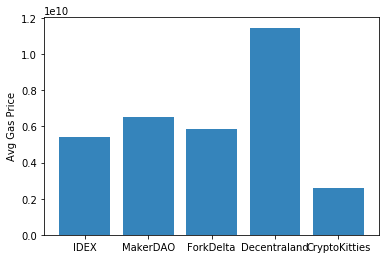

In [33]:

objects = ('IDEX', 'MakerDAO', 'ForkDelta', 'Decentraland', 'CryptoKitties')
y_pos = numpy.arange(len(objects))
performance = [5413484064, 6532569929, 5882123390, 11469721042, 2605700931]

plt.bar(y_pos, performance, align='center', alpha=0.9)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Gas Price')

plt.show()